## Introduction

**Name**: Ahmed Nadeem

**Reg**# 2018047

In [1]:
reg_no = 2018047
motor_speed_list = [31,42,27,18,73,84,75,56,20,39]
temperature_list = [91,92,93,94,95,96,97,98,99,100]
motor_speed = motor_speed_list[reg_no%10]
temperature = temperature_list[reg_no%10]

## Data

Observed motor speed and temperature

In [2]:
motor_speed, temperature

(56, 98)

In [3]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

## Temprature values in Farenhiet 

**Temprature:** Cool 60-78, Mild 78-90, Warm 90-100

In [4]:
temp_values = np.arange(60,101)
temp_values

array([ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100])

## Speed of motor in RPM

**Speed:** Slow, Medium, Fast

In [5]:
speed_values = np.arange(10, 90)
speed_values

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])

## Flow of water is to be determined

**Flow of water:** Slow, Medium, Fast

In [6]:
flow_values = np.arange(0, 12)
flow_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
temp_low = fuzz.trimf(temp_values, [60, 60, 78])
temp_med = fuzz.trimf(temp_values, [60, 78, 90])
temp_hi = fuzz.trimf(temp_values, [90, 100, 100])
speed_low = fuzz.trimf(speed_values, [10, 10, 40])
speed_med = fuzz.trimf(speed_values, [10, 40, 89])
speed_hi = fuzz.trimf(speed_values, [40, 89, 89])
flow_low = fuzz.trimf(flow_values, [0, 0, 3])
flow_med = fuzz.trimf(flow_values, [1, 5, 8])
flow_hi = fuzz.trimf(flow_values, [3, 11, 11])

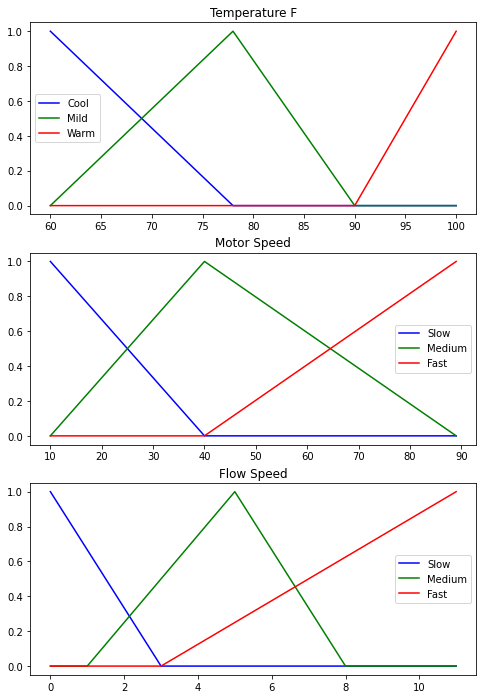

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 12))
ax0.plot(temp_values, temp_low, 'b', linewidth=1.5, label='Cool')
ax0.plot(temp_values, temp_med, 'g', linewidth=1.5, label='Mild')
ax0.plot(temp_values, temp_hi, 'r', linewidth=1.5, label='Warm')
ax0.set_title('Temperature F')
ax0.legend()

ax1.plot(speed_values, speed_low, 'b', linewidth=1.5, label='Slow')
ax1.plot(speed_values, speed_med, 'g', linewidth=1.5, label='Medium')
ax1.plot(speed_values, speed_hi, 'r', linewidth=1.5, label='Fast')
ax1.set_title('Motor Speed')
ax1.legend()

ax2.plot(flow_values, flow_low, 'b', linewidth=1.5, label='Slow')
ax2.plot(flow_values, flow_med, 'g', linewidth=1.5, label='Medium')
ax2.plot(flow_values, flow_hi, 'r', linewidth=1.5, label='Fast')
ax2.set_title('Flow Speed')
ax2.legend()

In [9]:
temp_level_low = fuzz.interp_membership(temp_values, temp_low, 98)
temp_level_med = fuzz.interp_membership(temp_values, temp_med, 98)
temp_level_hi = fuzz.interp_membership(temp_values, temp_hi, 98)
speed_level_low = fuzz.interp_membership(speed_values, speed_low, 56)
speed_level_med = fuzz.interp_membership(speed_values, speed_med, 56)
speed_level_hi = fuzz.interp_membership(speed_values, speed_hi, 56)

## Rules

**1.** If fan is fast and temp is warm then water flow is fast 

**2.** If fan is medium and temp is mild then water flow is medium

**3.** If fan is slow and temp is cool then water flow is slow

In [10]:
active_rule1 = np.fmax(temp_level_low, speed_level_low)
flow_activation_low= np.fmin(active_rule1, flow_low)
flow_activation_med = np.fmin(speed_level_med, flow_med)
active_rule3 = np.fmax(temp_level_hi, speed_level_hi)
flow_activation_hi = np.fmin(active_rule3, flow_hi)
flow0 = np.zeros_like(flow_values)

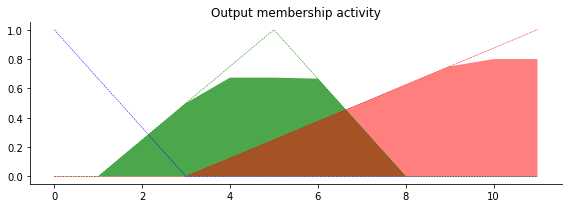

In [11]:
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(flow_values, flow0, flow_activation_low, facecolor='b', 
alpha=0.7)
ax0.plot(flow_values, flow_low, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(flow_values, flow0, flow_activation_med, facecolor='g', 
alpha=0.7)
ax0.plot(flow_values, flow_med, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(flow_values, flow0, flow_activation_hi, facecolor='r', alpha=0.5)
ax0.plot(flow_values, flow_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()